#### ASSIGNMENT 2:

You have been provided with an excel book on Cassava Yield Data.

1. Explore the dataset showing the distribution of all the variables (“Sesn” to "TotalTuberperHectare"). Further explore the variables for missing data and outliers. Go ahead and transform the dataset to handle missing information and outliers. (10 MARKS)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd

# import data
data = pd.read_excel('Cassava_Yield_Data.xlsx')

data

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
0,2,1,1,1,conv,F2150,28,0,0.0,61,2.5,319,4.7,380,13.571429,7.2,5.3,10000,13584.905660,716981.132075
1,2,1,1,1,conv,F1100,28,0,0.0,110,4.6,260,4.0,370,13.214286,8.6,5.3,10000,16226.415094,698113.207547
2,2,1,1,1,conv,F3200,28,2,0.2,115,5.2,319,4.4,436,15.571429,9.8,5.3,10000,18490.566038,822641.509434
3,2,1,1,1,conv,F5300,28,6,0.7,60,2.7,303,4.8,369,13.178571,8.2,5.3,10000,15471.698113,696226.415094
4,2,1,1,1,conv,F4250,28,3,0.3,82,3.4,332,4.7,417,14.892857,8.4,5.3,10000,15849.056604,786792.452830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2,2,3,3,conv,F1100,19,0,0.0,33,1.0,220,2.1,253,13.315789,3.1,4.2,10000,7380.952381,602380.952381
111,2,2,3,3,conv,F5300,16,0,0.0,22,1.0,204,1.9,226,14.125000,2.9,4.2,10000,6904.761905,538095.238095
112,2,2,3,3,conv,F2150,13,0,0.0,8,0.4,52,1.2,60,4.615385,1.6,4.2,10000,3809.523810,142857.142857
113,2,2,3,3,conv,F4250,20,0,0.0,42,1.9,91,1.8,133,6.650000,3.7,4.2,10000,8809.523810,316666.666667


In [2]:
# define independent and dependent variables  
indepenent_vars = data[['Sesn', 'locn', 'block', 'rep', 'tillage ', 'ferT']]
dependent_var = data[['TotalTuberperHectare']]

In [3]:
# explore the variables for missing data
data.isnull().sum()

Sesn                     0
locn                     0
block                    0
rep                      0
tillage                  0
ferT                     0
Plants_harvested         0
No_bigtubers             0
Weigh_bigtubers          0
No_mediumtubers          0
Weight_mediumtubers      0
No_smalltubers           0
Weight_smalltubers       0
Totaltuberno             0
AV_tubers_Plant          0
Total_tubweight          0
plotsize                 0
HEC                      0
TotalWeightperhectare    0
TotalTuberperHectare     0
dtype: int64

In [4]:
data.describe()

,Sesn,locn,block,rep,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,115.000000,115.000000
mean,1.521739,1.521739,2.043478,2.043478,18.565217,4.000000,0.614783,49.521739,2.771304,146.252174,2.511304,199.773913,10.525355,5.897391,4.486957,10000.0,13094.339623,431822.336810
std,0.501713,0.501713,0.809931,0.809931,6.442908,7.367544,1.174678,29.920757,1.774911,87.351663,1.303354,102.555168,3.248495,3.040702,0.485134,0.0,6896.716668,184839.313619
min,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.500000,57.000000,3.800000,1.000000,4.200000,10000.0,2380.952381,135714.285714
25%,1.000000,1.000000,1.000000,1.000000,14.000000,0.000000,0.000000,26.500000,1.300000,84.000000,1.500000,115.500000,8.027778,3.400000,4.200000,10000.0,8095.238095,275000.000000
50%,2.000000,2.000000,2.000000,2.000000,18.000000,0.000000,0.000000,44.000000,2.500000,109.000000,2.100000,179.000000,10.666667,6.000000,4.200000,10000.0,11904.761905,419047.619048
75%,2.000000,2.000000,3.000000,3.000000,28.000000,5.500000,0.700000,65.500000,3.950000,221.000000,3.600000,273.500000,12.973684,8.150000,5.300000,10000.0,16421.832884,589285.714286
max,2.000000,2.000000,3.000000,3.000000,28.000000,41.000000,7.000000,126.000000,8.100000,376.000000,5.400000,443.000000,19.200000,14.100000,5.300000,10000.0,33571.428571,835849.056604


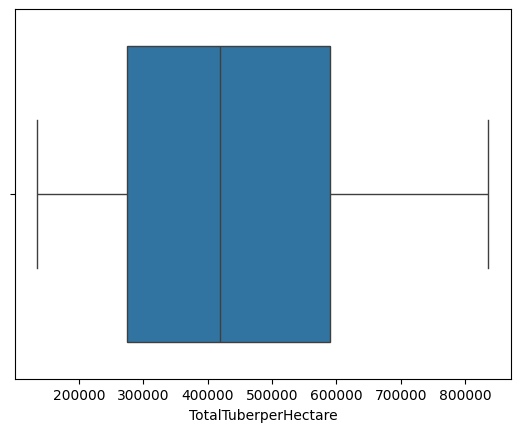

In [5]:
# find outliers in the target variable 'TotalTuberperHectare'
sns.boxplot(x=data['TotalTuberperHectare'])
plt.show()

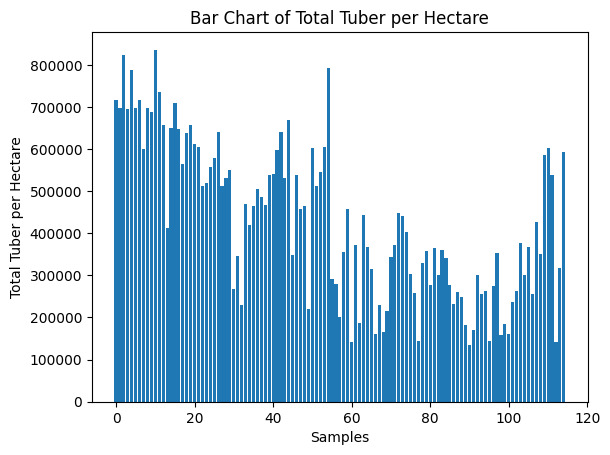

In [6]:
# find outliers in the target variable 'TotalTuberperHectare' using a bar chart
plt.bar(data.index, data['TotalTuberperHectare'])
plt.xlabel('Samples')
plt.ylabel('Total Tuber per Hectare')
plt.title('Bar Chart of Total Tuber per Hectare')
plt.show()

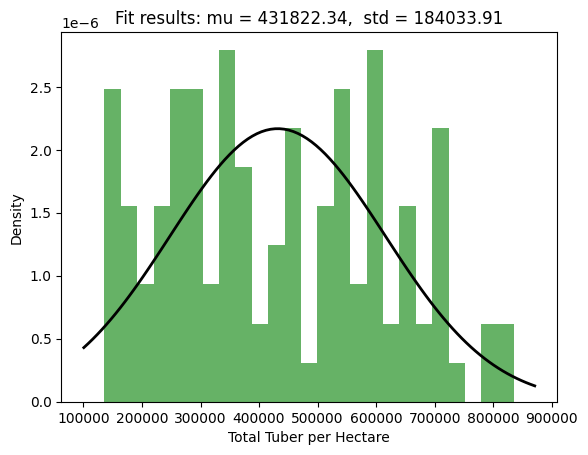

In [7]:
# plot a normal distribution graph based on 'TotalTuberperHectare'
mu, std = norm.fit(data['TotalTuberperHectare'])
plt.hist(data['TotalTuberperHectare'], bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Total Tuber per Hectare')
plt.ylabel('Density')
plt.show()


2. Investigate the relationships between the following variables using displays (graphs) and statistical tests; [25 Marks]

      a. Two continuous variables
      
      b. One continuous variable and one categorical variable
      
      c. Two categorical variables

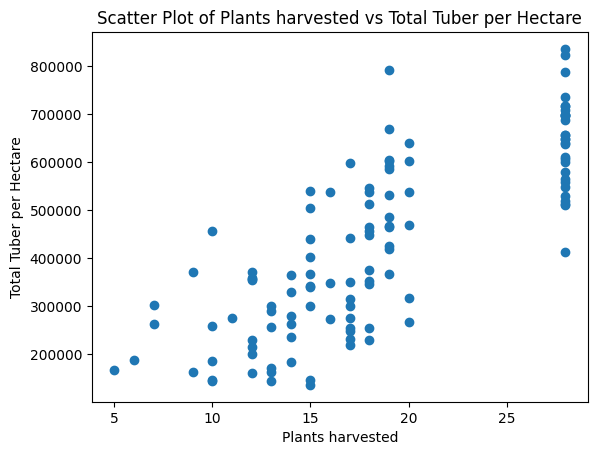

Correlation coefficient between Plants harvested and Total Tuber per Hectare: 0.7907945946386895


In [8]:
# Investigate the relationships between the following variables using displays (graphs) and statistical tests

# a) Continuous Variables ('Plants_harvested' and 'TotalTuberperHectare')
plt.scatter(data['Plants_harvested'], data['TotalTuberperHectare'])
plt.xlabel('Plants harvested')
plt.ylabel('Total Tuber per Hectare')
plt.title('Scatter Plot of Plants harvested vs Total Tuber per Hectare')
plt.show()

# Calculate the correlation coefficient
correlation = data['Plants_harvested'].corr(data['TotalTuberperHectare'])
print(f'Correlation coefficient between Plants harvested and Total Tuber per Hectare: {correlation}')



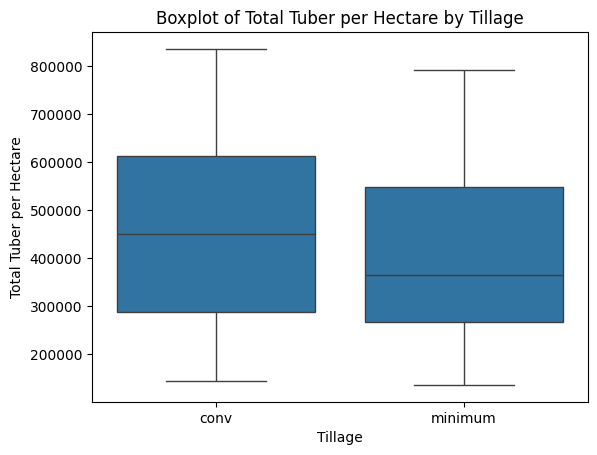

In [9]:
# b) Categorical and Continuous Variable ('tillage' and 'TotalTuberperHectare')
sns.boxplot(x='tillage ', y='TotalTuberperHectare', data=data)
plt.xlabel('Tillage')
plt.ylabel('Total Tuber per Hectare')
plt.title('Boxplot of Total Tuber per Hectare by Tillage')
plt.show()


Contingency Table between locn and tillage:
tillage   conv  minimum
locn                   
1           30       25
2           30       30


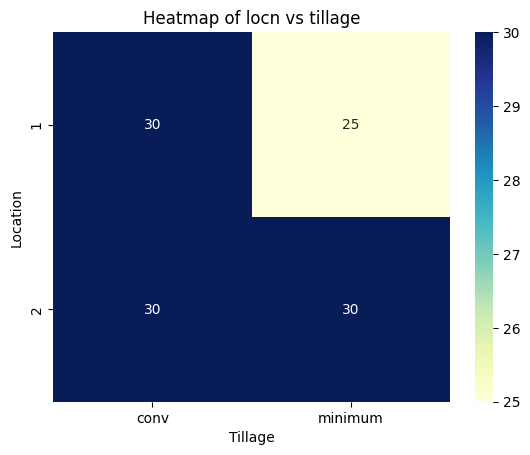

In [10]:
# c) Categorical Variables ('locn' and 'tillage')
contingency_table = pd.crosstab(data['locn'], data['tillage '])
print('Contingency Table between locn and tillage:')
print(contingency_table)

# using a heatmap to visualize the relationship
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Tillage')
plt.ylabel('Location')
plt.title('Heatmap of locn vs tillage')
plt.show()

3. Cassava farmers in Soroti would like to know the following aspects to help inform their farming practices; [20 Marks]

      a. Does fertilizer application affect the projected “TotalWeightperhectare” and the "TotalTuberperHectare?"

      b. Does the tillage method (“conv” and “minimum”) affect the projected “TotalWeightperhectare” and "TotalTuberperHectare?"

In [11]:
from scipy.stats import f_oneway

# Perform one-way ANOVA between 'ferT' and 'TotalTuberperHectare'
groups = [group['TotalTuberperHectare'].values for name, group in data.groupby('ferT')]
f_stat, p_value = f_oneway(*groups)

print(f'ANOVA results between ferT and Total Tuber per Hectare: F-statistic = {f_stat}, p-value = {p_value}')

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in Total Tuber per Hectare across different ferT groups.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in Total Tuber per Hectare across different ferT groups.')

ANOVA results between ferT and Total Tuber per Hectare: F-statistic = 0.4044847870195448, p-value = 0.8050717218650285
Fail to reject the null hypothesis: There is no significant difference in Total Tuber per Hectare across different ferT groups.


In [12]:
# Perform one-way ANOVA between 'ferT' and 'TotalWeightperhectare'
groups_weight = [group['TotalWeightperhectare'].values for name, group in data.groupby('ferT')]
f_stat_weight, p_value_weight = f_oneway(*groups_weight)
print(f'ANOVA results between ferT and Total Weight per Hectare: F-statistic = {f_stat_weight}, p-value = {p_value_weight}')

# Interpret the p-value
if p_value_weight < alpha:
    print('Reject the null hypothesis: There is a significant difference in Total Weight per Hectare across different ferT groups.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in Total Weight per Hectare across different ferT groups.')

ANOVA results between ferT and Total Weight per Hectare: F-statistic = 2.0925234987267136, p-value = 0.08660013052508757
Fail to reject the null hypothesis: There is no significant difference in Total Weight per Hectare across different ferT groups.


In [13]:
# Perform one-way ANOVA between 'tilage' and 'TotalWeightperhectare'
groups_weight_tillage = [group['TotalWeightperhectare'].values for name, group in data.groupby('tillage ')]
f_stat_weight_tillage, p_value_weight_tillage = f_oneway(*groups_weight_tillage)
print(f'ANOVA results between tillage and Total Weight per Hectare: F-statistic = {f_stat_weight_tillage}, p-value = {p_value_weight_tillage}')

# Interpret the p-value
if p_value_weight_tillage < alpha:
    print('Reject the null hypothesis: There is a significant difference in Total Weight per Hectare across different tillage groups.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in Total Weight per Hectare across different tillage groups.')

ANOVA results between tillage and Total Weight per Hectare: F-statistic = 0.2623545079408353, p-value = 0.6095068299652041
Fail to reject the null hypothesis: There is no significant difference in Total Weight per Hectare across different tillage groups.


4. Check for association between fertilisers across seasons for Cassava using a suitable mining algorithm. [20 Marks]

In [14]:
from scipy.stats import chi2_contingency

# check for associaation between 'ferT' and 'Sesn' using chi-square test
contingency_table_ferT_Sesn = pd.crosstab(data['ferT'], data['Sesn'])
chi2, p, dof, expected = chi2_contingency(contingency_table_ferT_Sesn)
print(f'Chi-square test results between ferT and Sesn: Chi2 = {chi2}, p-value = {p}')

# conclude on the association
if p < alpha:
    print('There is a significant association between ferT and Sesn.')
else:
    print('There is no significant association between ferT and Sesn.')

Chi-square test results between ferT and Sesn: Chi2 = 0.0, p-value = 1.0
There is no significant association between ferT and Sesn.


5. Generate a predictive model for the variable "Plants_harvested" that  can be used to inform farmers and policymakers. How acurate is your model?  [25 Marks]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# generate a predictive model for the variable 'Plants_harvested'
target_variable = 'Plants_harvested'
predictor_variables = ['Sesn', 'locn', 'block', 'rep']

X = data[predictor_variables].values
y = data[target_variable].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



print('Training feature set shape:', X_train.shape)
print('Testing feature set shape:', X_test.shape)
print('Training target set shape:', y_train.shape)
print('Testing target set shape:', y_test.shape)

# create and test the Decision Tree Model
clf = DecisionTreeClassifier(random_state=42)
d_tree = clf.fit(X_train, y_train)
prediction = d_tree.predict(X_test)

print(prediction)


Training feature set shape: (92, 4)
Testing feature set shape: (23, 4)
Training target set shape: (92,)
Testing target set shape: (23,)
[12 28 19 12 28 19 12 12 19 28 17 19 12 16 28 28 12 28 15 19 15 16 28]


In [20]:
# Measure accuracy
from sklearn import metrics

F1_score = metrics.f1_score(y_test, prediction, average='weighted')
print('F1 Score of the Decision Tree Model:', F1_score)

F1 Score of the Decision Tree Model: 0.3416149068322981
